# Recursos


In [165]:
%reset -f
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random



global estados_visitados
estados_visitados=list()

class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

        
    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError 
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)

In [166]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return self.state

In [167]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

In [168]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def VORAZ(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))

def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

def A(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))

class Board(Node):
  'a Board for a 8-puzzle game'
  def __repr__(self):
      return (3 * '|{}|{}|{}|\n').format(*self.state).replace('0','-')

# Punto 1: Heuristica número de piezas mal ubicadas

In [ ]:
class Rompecabezas(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):

    frontera=list()
    lista=list()

    res=1
    lista=list(node.state.strip().split(', '))

    if lista not in estados_visitados:
          estados_visitados.append(lista)
    else:
      res=0

    if res==1:
      pos=lista.index('0')

      if pos==0:
        frontera.append('R')
        frontera.append('D')
      elif pos==1:
        frontera.append('D')
        frontera.append('L')
        frontera.append('R')
      elif pos==2:
        frontera.append('L')
        frontera.append('D')
      elif pos==3:
        frontera.append('D')
        frontera.append('U')
        frontera.append('R')
      elif pos==4:
        frontera.append('D')
        frontera.append('U')
        frontera.append('R')
        frontera.append('L')
      elif pos==5:
        frontera.append('D')
        frontera.append('U')
        frontera.append('L')
      elif pos==6:
        frontera.append('U')
        frontera.append('R')
      elif pos==7:
        frontera.append('U')
        frontera.append('L')
        frontera.append('R')
      elif pos==8:
        frontera.append('U')
        frontera.append('L')

    else:
      frontera=[]
      
    moves = {
        node.state:frontera,
        }
    return moves[node.state]        

  def result(self, node, action):
    new_state=dict()

    lista=list(node.state.strip().split(', '))
    movimiento = lista.copy()
    pos=lista.index('0')

    if action == 'U':
      movimiento[pos], movimiento[pos - 3]  = movimiento[pos - 3], movimiento[pos] 

    if action == 'L':
      movimiento[pos], movimiento[pos - 1]  = movimiento[pos - 1], movimiento[pos] 

    if action == 'D':
      movimiento[pos], movimiento[pos + 3]  = movimiento[pos + 3], movimiento[pos] 

    if action == 'R':
      movimiento[pos], movimiento[pos + 1]  = movimiento[pos + 1], movimiento[pos] 
    
    action_result=", ".join(map(str, movimiento))
    new_state[action]=action_result

    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost=dict()
    cost[node.state,succesor.state]=1

    return cost[(node.state, succesor.state)]

  def h(self, node):
    
    heuristic=dict()
    valor=0
    lista=list(node.state.strip().split(', '))

    if lista[0]!='1':
      valor=valor+1

    if lista[1]!='2':
      valor=valor+1

    if lista[2]!='3':
      valor=valor+1

    if lista[3]!='4':
      valor=valor+1

    if lista[4]!='5':
      valor=valor+1

    if lista[5]!='6':
      valor=valor+1

    if lista[6]!='7':
      valor=valor+1

    if lista[7]!='8':
      valor=valor+1

    if lista[8]!='0':
      valor=valor+1
    
    heuristic[node.state]=valor
    return heuristic[node.state]  

In [ ]:
S = Node(state='1, 0, 2, 7, 4, 3, 8, 6, 5')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaUCS = Rompecabezas(initial=S, goal=G)

print('----------------UCS:--------------------')
estados_visitados.clear()
solutionUCS = UCS(problemaUCS)
print('Action sequence:', solutionUCS.actions_path())
print('State sequence:')
for i in range(len(solutionUCS.states_path())):
  cadena=str(solutionUCS.states_path()[i])
  print(Board(cadena.strip().split(', ')))
print('Cost:', solutionUCS.path_cost())
Nodos_UCS=len(estados_visitados)
print('Nodos expandidos',Nodos_UCS)

----------------UCS:--------------------
Action sequence: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 9
Nodos expandidos 459


In [ ]:
S = Node(state='1, 0, 2, 7, 4, 3, 8, 6, 5')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaVORAZ = Rompecabezas(initial=S, goal=G)


print('----------------Voraz:--------------------')
estados_visitados.clear()
solutionV = VORAZ(problemaVORAZ)

print('Action sequence:', solutionV.actions_path())
print('State sequence:')

for i in range(len(solutionV.states_path())):
  cadena=str(solutionV.states_path()[i])
  print(Board(cadena.strip().split(', ')))

print('Cost:', solutionV.path_cost())
Nodos_Voraz=len(estados_visitados)
print('Nodos expandidos',Nodos_Voraz)

----------------Voraz:--------------------
Action sequence: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 9
Nodos expandidos 10


In [ ]:
S = Node(state='1, 0, 2, 7, 4, 3, 8, 6, 5')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaA = Rompecabezas(initial=S, goal=G)

print('----------------A*:--------------------')
estados_visitados.clear()
solutionA = A(problemaA)

print('Action sequence:', solutionA.actions_path())
print('State sequence:')

for i in range(len(solutionA.states_path())):
  cadena=str(solutionA.states_path()[i])
  print(Board(cadena.strip().split(', ')))

print('Cost:', solutionA.path_cost())

Nodos_A=len(estados_visitados)
print('Nodos expandidos',Nodos_A)

----------------A*:--------------------
Action sequence: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 9
Nodos expandidos 24


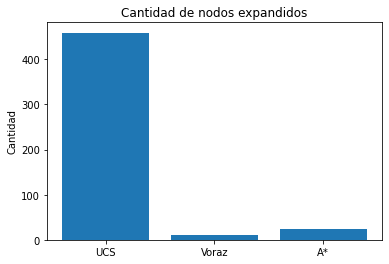

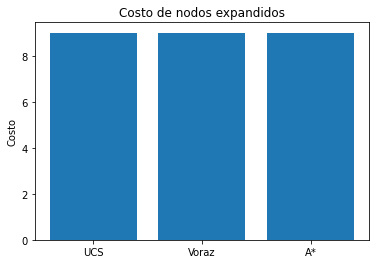

In [ ]:
metodos=['UCS','Voraz','A*']
nodos=[459,10,24]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()

metodos=['UCS','Voraz','A*']
costo=[9,9,9]
fig, ax = plt.subplots()
ax.set_ylabel('Costo')
ax.set_title('Costo de nodos expandidos')
plt.bar(metodos, costo)
plt.show()

# Punto 2: Heuristica distancia de Manhattan

In [ ]:
class RompecabezasManhattan(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):

    frontera=list()
    lista=list()

    res=1
    lista=list(node.state.strip().split(', '))

    if lista not in estados_visitados:
          estados_visitados.append(lista)
    else:
      res=0

    if res==1:
      pos=lista.index('0')

      if pos==0:
        frontera.append('R')
        frontera.append('D')
      elif pos==1:
        frontera.append('D')
        frontera.append('L')
        frontera.append('R')
      elif pos==2:
        frontera.append('L')
        frontera.append('D')
      elif pos==3:
        frontera.append('D')
        frontera.append('U')
        frontera.append('R')
      elif pos==4:
        frontera.append('D')
        frontera.append('U')
        frontera.append('R')
        frontera.append('L')
      elif pos==5:
        frontera.append('D')
        frontera.append('U')
        frontera.append('L')
      elif pos==6:
        frontera.append('U')
        frontera.append('R')
      elif pos==7:
        frontera.append('U')
        frontera.append('L')
        frontera.append('R')
      elif pos==8:
        frontera.append('U')
        frontera.append('L')

    else:
      frontera=[]
      
    moves = {
        node.state:frontera,
        }
    return moves[node.state]        

  def result(self, node, action):
    new_state=dict()

    lista=list(node.state.strip().split(', '))
    movimiento = lista.copy()
    pos=lista.index('0')

    if action == 'U':
      movimiento[pos], movimiento[pos - 3]  = movimiento[pos - 3], movimiento[pos] 

    if action == 'L':
      movimiento[pos], movimiento[pos - 1]  = movimiento[pos - 1], movimiento[pos] 

    if action == 'D':
      movimiento[pos], movimiento[pos + 3]  = movimiento[pos + 3], movimiento[pos] 

    if action == 'R':
      movimiento[pos], movimiento[pos + 1]  = movimiento[pos + 1], movimiento[pos] 
    
    action_result=", ".join(map(str, movimiento))
    new_state[action]=action_result

    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost=dict()
    cost[node.state,succesor.state]=1

    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic=dict()
    Goal='1, 2, 3, 4, 5, 6, 7, 8, 0'
    
    GoalList=list(Goal.strip().split(', '))
    StateList=list(node.state.strip().split(', '))
    Manhattan=0

    for i in range(1,len(GoalList)+1):
      if i==9:
        obj='0'
      else:
        obj=str(i)
      posState=int(StateList.index(obj))
      posGoal=int(GoalList.index(obj))

      X=(0, 0, 0, 1, 1, 1, 2, 2, 2)
      Y=(0, 1, 2, 0, 1, 2, 0, 1, 2)

      Manhattan=Manhattan+(abs(-X[posState]+X[posGoal])+abs(-Y[posState]+Y[posGoal]))

    heuristic[node.state]=Manhattan
    return heuristic[node.state]

In [ ]:
S = Node(state='1, 0, 2, 7, 4, 3, 8, 6, 5')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaUCS = RompecabezasManhattan(initial=S, goal=G)

print('----------------UCS:--------------------')
estados_visitados.clear()
solutionUCS = UCS(problemaUCS)
print('Action sequence:', solutionUCS.actions_path())
print('State sequence:')
for i in range(len(solutionUCS.states_path())):
  cadena=str(solutionUCS.states_path()[i])
  print(Board(cadena.strip().split(', ')))
print('Cost:', solutionUCS.path_cost())
Nodos_UCS=len(estados_visitados)
print('Nodos expandidos',Nodos_UCS)

----------------UCS:--------------------
Action sequence: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 9
Nodos expandidos 459


In [ ]:
S = Node(state='1, 0, 2, 7, 4, 3, 8, 6, 5')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaVORAZ = RompecabezasManhattan(initial=S, goal=G)


print('----------------Voraz:--------------------')
estados_visitados.clear()
solutionV = VORAZ(problemaVORAZ)

print('Action sequence:', solutionV.actions_path())
print('State sequence:')

for i in range(len(solutionV.states_path())):
  cadena=str(solutionV.states_path()[i])
  print(Board(cadena.strip().split(', ')))

print('Cost:', solutionV.path_cost())
Nodos_Voraz=len(estados_visitados)
print('Nodos expandidos',Nodos_Voraz)

----------------Voraz:--------------------
Action sequence: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 9
Nodos expandidos 9


In [ ]:
S = Node(state='1, 0, 2, 7, 4, 3, 8, 6, 5')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaA = RompecabezasManhattan(initial=S, goal=G)

print('----------------A*:--------------------')
estados_visitados.clear()
solutionA = A(problemaA)

print('Action sequence:', solutionA.actions_path())
print('State sequence:')

for i in range(len(solutionA.states_path())):
  cadena=str(solutionA.states_path()[i])
  print(Board(cadena.strip().split(', ')))

print('Cost:', solutionA.path_cost())

Nodos_A=len(estados_visitados)
print('Nodos expandidos',Nodos_A)

----------------A*:--------------------
Action sequence: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 9
Nodos expandidos 9


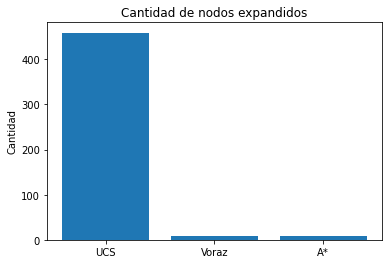

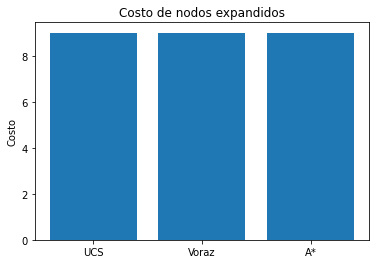

In [ ]:
metodos=['UCS','Voraz','A*']
nodos=[459,9,9]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()

metodos=['UCS','Voraz','A*']
costo=[9,9,9]
fig, ax = plt.subplots()
ax.set_ylabel('Costo')
ax.set_title('Costo de nodos expandidos')
plt.bar(metodos, costo)
plt.show()

# Punto 3: Comparación nodos expandidos A* vs UCS



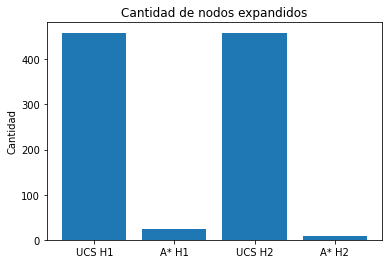

In [ ]:
metodos=['UCS H1','A* H1','UCS H2','A* H2']
nodos=[459,24,459,9]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()

Como se puede ver, en primer lugar UCS expande los mismos nodos en las dos heuristicas ya que UCS no tiene en cuenta la heuristica sino el costo.

Al ver los nodos expandidos vemos la verdadera diferencia entre una busqueda informada y una no informada, la informada expande menos noodos ya que tiene un indicio por donde buscar, no va a estar buscando por todos lados como si hace una busqueda no informada.

# Punto 4: Comparacion costo UCS vs Voraz

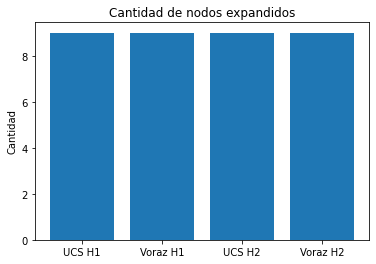

In [ ]:
metodos=['UCS H1','Voraz H1','UCS H2','Voraz H2']
nodos=[9,9,9,9]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()

Como se puede ver, el costo de Voraz y de UCS en los dos casos fue de 9, esto debido a que Voraz convenientemente expandio la solucion mas barata, lo que nos dice la teoria es que UCS no puede costar mas que Voraz ya que UCS toma la solucion mas barata posible.
Pero en ningun momento se dice que Voraz puede tener el mismo costo que UCS, aunque es curioso ver que si volvemos a ejecurtar Voraz, el costo cambia a 11, ya que Voraz no se fija en el costo sino en la heuristica

# Punto 5: Nueva Heuristica que expande menos que Manhattan

para esta nueva heuristica tome la distancia de Manhattan y le sume un valor extra.
Se planteo de la siguiente forma, imaginemos que tenemos la siguiente configuración:

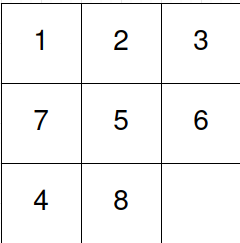

en esta configuración por distancia de manhattan la heuristica inicial nos daria 2, ya que 4 y 7 estan fuera de posición. 
pero aca hay un factor, y es que esas dos figuras al estar juntas, es decir, ser adyasentes se necesita intercambiar de lugar esas dos fichas (es decir 7 <-> 4) pero esto no se puede ya que la unica ficha que se puede mover como tal es 0, por lo que aunque este relativamente cerca, se deben hacer varios pasos mas para intercambiar las dos fichas, por lo que a la distancia de manhattan le decidimos añadir un valor extra y es el numero de fichas adyasentes, ya que estas en realidad aun estan lejos de la solucion, en este caso, el numero de fichas adyasentes son 2 (4 y 7) por lo que en este particular caso la heuristica seria 4.

la unica ficha que puede ser adyasente es 0 debido a que es la ficha que se puede mover.

In [169]:
class RompecabezasOtraHeuristica(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):

    frontera=list()
    lista=list()

    res=1
    lista=list(node.state.strip().split(', '))

    if lista not in estados_visitados:
          estados_visitados.append(lista)
    else:
      res=0

    if res==1:
      pos=lista.index('0')

      if pos==0:
        frontera.append('R')
        frontera.append('D')
      elif pos==1:
        frontera.append('D')
        frontera.append('L')
        frontera.append('R')
      elif pos==2:
        frontera.append('L')
        frontera.append('D')
      elif pos==3:
        frontera.append('D')
        frontera.append('U')
        frontera.append('R')
      elif pos==4:
        frontera.append('D')
        frontera.append('U')
        frontera.append('R')
        frontera.append('L')
      elif pos==5:
        frontera.append('D')
        frontera.append('U')
        frontera.append('L')
      elif pos==6:
        frontera.append('U')
        frontera.append('R')
      elif pos==7:
        frontera.append('U')
        frontera.append('L')
        frontera.append('R')
      elif pos==8:
        frontera.append('U')
        frontera.append('L')

    else:
      frontera=[]
      
    moves = {
        node.state:frontera,
        }
    return moves[node.state]        

  def result(self, node, action):
    new_state=dict()

    lista=list(node.state.strip().split(', '))
    movimiento = lista.copy()
    pos=lista.index('0')

    if action == 'U':
      movimiento[pos], movimiento[pos - 3]  = movimiento[pos - 3], movimiento[pos] 

    if action == 'L':
      movimiento[pos], movimiento[pos - 1]  = movimiento[pos - 1], movimiento[pos] 

    if action == 'D':
      movimiento[pos], movimiento[pos + 3]  = movimiento[pos + 3], movimiento[pos] 

    if action == 'R':
      movimiento[pos], movimiento[pos + 1]  = movimiento[pos + 1], movimiento[pos] 
    
    action_result=", ".join(map(str, movimiento))
    new_state[action]=action_result

    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost=dict()
    cost[node.state,succesor.state]=1

    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic=dict()
    Goal='1, 2, 3, 4, 5, 6, 7, 8, 0'
    
    GoalList=list(Goal.strip().split(', '))
    StateList=list(node.state.strip().split(', '))

    adyasente=0
    Manhattan=0
    distancia=0

    for i in range(1,len(GoalList)+1):
      if i==9:
        obj='0'
      else:
        obj=str(i)
      posState=int(StateList.index(obj))
      posGoal=int(GoalList.index(obj))

      X=(0, 0, 0, 1, 1, 1, 2, 2, 2)
      Y=(0, 1, 2, 0, 1, 2, 0, 1, 2)

      distancia=(abs(-X[posState]+X[posGoal])+abs(-Y[posState]+Y[posGoal]))

      #Miro si hay adyasentes:
      if distancia==1 and GoalList[posGoal]!='0' and StateList[posGoal]!='0':
        if(GoalList[posGoal]==StateList[posState] and StateList[posGoal]==GoalList[posState]):
          adyasente=adyasente+1
      
      Manhattan=Manhattan+distancia

    Manhattan=Manhattan+adyasente
    heuristic[node.state]=Manhattan
    return heuristic[node.state]

In [170]:
S = Node(state='1, 4, 2, 0, 7, 5, 3, 6, 8')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaA = RompecabezasOtraHeuristica(initial=S, goal=G)

print('----------------A*:--------------------')
estados_visitados.clear()
solutionA = A(problemaA)

print('Action sequence:', solutionA.actions_path())
print('State sequence:')

for i in range(len(solutionA.states_path())):
  cadena=str(solutionA.states_path()[i])
  print(Board(cadena.strip().split(', ')))

print('Cost:', solutionA.path_cost())

Nodos_A=len(estados_visitados)
print('Nodos expandidos',Nodos_A)

----------------A*:--------------------
Action sequence: ['D', 'R', 'U', 'L', 'D', 'R', 'R', 'U', 'L', 'L', 'D', 'R', 'U', 'U', 'R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|4|2|
|-|7|5|
|3|6|8|

|1|4|2|
|3|7|5|
|-|6|8|

|1|4|2|
|3|7|5|
|6|-|8|

|1|4|2|
|3|-|5|
|6|7|8|

|1|4|2|
|-|3|5|
|6|7|8|

|1|4|2|
|6|3|5|
|-|7|8|

|1|4|2|
|6|3|5|
|7|-|8|

|1|4|2|
|6|3|5|
|7|8|-|

|1|4|2|
|6|3|-|
|7|8|5|

|1|4|2|
|6|-|3|
|7|8|5|

|1|4|2|
|-|6|3|
|7|8|5|

|1|4|2|
|7|6|3|
|-|8|5|

|1|4|2|
|7|6|3|
|8|-|5|

|1|4|2|
|7|-|3|
|8|6|5|

|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 23
Nodos expandidos 1822


In [156]:
S = Node(state='1, 4, 2, 0, 7, 5, 3, 6, 8')
G = Node(state='1, 2, 3, 4, 5, 6, 7, 8, 0')
problemaUCS = RompecabezasOtraHeuristica(initial=S, goal=G)

print('----------------UCS:--------------------')
estados_visitados.clear()
solutionUCS = UCS(problemaUCS)
print('Action sequence:', solutionUCS.actions_path())
print('State sequence:')
for i in range(len(solutionUCS.states_path())):
  cadena=str(solutionUCS.states_path()[i])
  print(Board(cadena.strip().split(', ')))
print('Cost:', solutionUCS.path_cost())
Nodos_UCS=len(estados_visitados)
print('Nodos expandidos',Nodos_UCS)

----------------UCS:--------------------
Action sequence: ['D', 'R', 'U', 'L', 'D', 'R', 'R', 'U', 'L', 'L', 'D', 'R', 'U', 'U', 'R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
State sequence:
|1|4|2|
|-|7|5|
|3|6|8|

|1|4|2|
|3|7|5|
|-|6|8|

|1|4|2|
|3|7|5|
|6|-|8|

|1|4|2|
|3|-|5|
|6|7|8|

|1|4|2|
|-|3|5|
|6|7|8|

|1|4|2|
|6|3|5|
|-|7|8|

|1|4|2|
|6|3|5|
|7|-|8|

|1|4|2|
|6|3|5|
|7|8|-|

|1|4|2|
|6|3|-|
|7|8|5|

|1|4|2|
|6|-|3|
|7|8|5|

|1|4|2|
|-|6|3|
|7|8|5|

|1|4|2|
|7|6|3|
|-|8|5|

|1|4|2|
|7|6|3|
|8|-|5|

|1|4|2|
|7|-|3|
|8|6|5|

|1|-|2|
|7|4|3|
|8|6|5|

|1|2|-|
|7|4|3|
|8|6|5|

|1|2|3|
|7|4|-|
|8|6|5|

|1|2|3|
|7|4|5|
|8|6|-|

|1|2|3|
|7|4|5|
|8|-|6|

|1|2|3|
|7|4|5|
|-|8|6|

|1|2|3|
|-|4|5|
|7|8|6|

|1|2|3|
|4|-|5|
|7|8|6|

|1|2|3|
|4|5|-|
|7|8|6|

|1|2|3|
|4|5|6|
|7|8|-|

Cost: 23
Nodos expandidos 104376


#Punto 6: Comparación UCS vs A*

en este ejercicio particular si se vio la diferencia entre un algoritmo de busqueda informada y no informada, aunque los dos exanden muchos nodos, UCS expandio aproximadamente 100 veces mas nodos que A*, ademas UCS demoro aproximadamente 1h en encontrar solucion, mientras que A* no se demoro mas de 2 segundos, comparando los nodos expandidos:

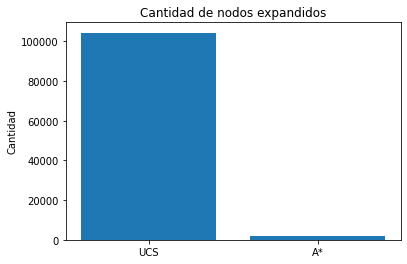

In [171]:
metodos=['UCS','A*',]
nodos=[104376,1822]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()

El costo si fue el mismo (23) ya que tanto UCS como A* tienen en cuenta el costo. incluso la solucion fue la misma, solo que A* la encontro antes